In [1]:
import pandas as pd
import numpy as num
mydata = pd.read_csv('glass source classification dataset.csv')
mydata.head()

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,NaN,Does not exist,Does not exist,building_window glass
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,Does not exist,Does not exist,building_window glass
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,Does not exist,Does not exist,building_window glass
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,NaN,Does not exist,Does not exist,building_window glass
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,Does not exist,Does not exist,building_window glass


In [2]:
import pandas as pd
mydata.isnull().sum()

Unnamed: 0    0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            6
Ba            0
Fe            0
Type          0
dtype: int64

In [3]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=num.nan, strategy='mean')
impute.fit(mydata[['Ca']])
mydata['Ca']=impute.transform(mydata[['Ca']])
mydata

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.96524,Does not exist,Does not exist,building_window glass
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83000,Does not exist,Does not exist,building_window glass
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78000,Does not exist,Does not exist,building_window glass
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.96524,Does not exist,Does not exist,building_window glass
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07000,Does not exist,Does not exist,building_window glass
...,...,...,...,...,...,...,...,...,...,...,...
209,209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18000,exists,Does not exist,headlamp glass
210,210,1.51685,14.92,0.00,1.99,73.06,0.00,8.96524,exists,Does not exist,headlamp glass
211,211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44000,exists,Does not exist,headlamp glass
212,212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48000,exists,Does not exist,headlamp glass


In [4]:
mydata.Ba = [1 if i == "Does not exist" else 0 for i in mydata.Ba]
mydata.Fe = [1 if i == "Does not exist" else 0 for i in mydata.Fe]
mydata['Type'] = mydata['Type'].map({'building_window glass':1,'vehicle_window glass':0,'container glass':2,'headlamp glass':3,'tableware glass':4})
mydata.head(20)

,Unnamed: 0,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0,1.52101,13.64,4.49,1.10,71.78,0.06,8.96524,1,1,1
1,1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83000,1,1,1
2,2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78000,1,1,1
3,3,1.51766,13.21,3.69,1.29,72.61,0.57,8.96524,1,1,1
4,4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07000,1,1,1
5,5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07000,1,0,1
6,6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17000,1,1,1
7,7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24000,1,1,1
8,8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30000,1,1,1
9,9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40000,1,0,1


In [12]:
from sklearn.model_selection import train_test_split
X=mydata.drop(['Type'], axis = 1)
X=X.drop(X.columns[0],axis=1)
y=mydata['Type']
#X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)
#mydata.head()

In [18]:
#Checking Accuracy For  Logistic Regression
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
#print(predictions)
acc=accuracy_score(y_test, predictions)
print(acc)
#print(predictions)
#print(y_test)

0.8604651162790697


In [7]:
#Checking Accuracy For  Logistic Regression
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=1)
model.fit(X_train,y_train)
decision_pred = model.predict(X_test)
disicion_acc=accuracy_score(y_test,decision_pred)
print(disicion_acc)

0.8372093023255814


In [8]:
if (acc<disicion_acc):
    diff= disicion_acc-acc
    difference = f'Decision Tree gets {diff*100}% more accuracy'
elif(acc>disicion_acc):
    diff= acc-disicion_acc
    difference = f'Logistic Regression gets {diff*100}% more accuracy'
    
    

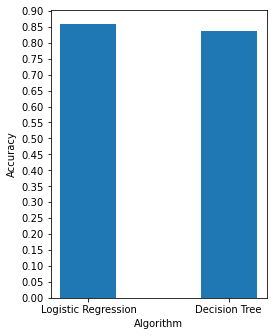

Logistic Regression gets 2.3255813953488302% more accuracy


In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,.5,1])
algo = ['Logistic Regression', 'Decision Tree']
accuracy  = [acc,disicion_acc]
plt.yticks(num.arange(0, max(y), .05))
plt.xlabel("Algorithm") 
plt.ylabel("Accuracy") 
ax.bar(algo,accuracy,width = 0.4)
plt.show()
print(difference)